#  Are there any notable differences in terms of how users rate free versus paid apps based on the presence of issues or bugs, and do users tend to be more forgiving of issues or bugs in one type of app versus the other? (Attribute: Type (Free/Paid), Ratings)

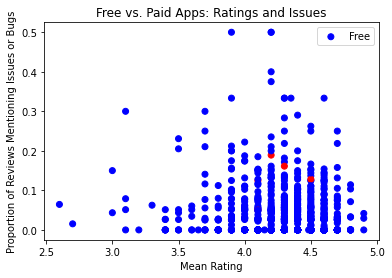

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_apps = pd.read_csv('C:/Users/Amina Firdouse/Desktop/masters-EA/Project/googleplaystore.csv')
df_reviews = pd.read_csv('C:/Users/Amina Firdouse/Desktop/masters-EA/Project/googleplaystore_user_reviews.csv')

# Merge the datasets on the app name
merged = pd.merge(df_apps, df_reviews, on='App')

# Filter the merged dataset to include only free and paid apps
merged = merged[merged['Type'].isin(['Free', 'Paid'])]

# Calculate the mean rating for each app
mean_ratings = merged.groupby(['App', 'Type'])['Rating'].mean().reset_index()

# Calculate the proportion of reviews that mention issues or bugs for each app
merged['Issues'] = merged['Translated_Review'].str.lower().str.contains('issue|bug')
issue_proportions = merged.groupby(['App', 'Type'])['Issues'].mean().reset_index()

# Merge the mean rating and issue proportion dataframes
df = pd.merge(mean_ratings, issue_proportions, on=['App', 'Type'])

# Create a scatter plot of issue proportions versus mean ratings
colors = {'Free': 'blue', 'Paid': 'red'}
plt.scatter(df['Rating'], df['Issues'], c=df['Type'].apply(lambda x: colors[x]))
plt.xlabel('Mean Rating')
plt.ylabel('Proportion of Reviews Mentioning Issues or Bugs')
plt.title('Free vs. Paid Apps: Ratings and Issues')
plt.legend(['Free', 'Paid'])
plt.show()
